# OFFENSES NEW YORK 

[dataset NY](https://www.kaggle.com/adamschroeder/crimes-new-york-city?select=Crime_Column_Description.csv)

In [1]:
# topicos a serem executados
#  agrupamento por ano , ofensas ano a ano

# 
# 
# df.groupby(df['data']).dt.year['vendas'].sum()

# gerando grafico
# df.groupby(df['data'].dt.year)['vendas'].sum().plot.bar()

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# importando os dados referentes aos delitos em nova york
ny  = pd.read_csv('NYPD_Complaint_Data_Historic.csv')

C:\Users\Biena\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (17) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
ny.head()

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,RPT_DT,KY_CD,OFNS_DESC,PD_CD,PD_DESC,...,ADDR_PCT_CD,LOC_OF_OCCUR_DESC,PREM_TYP_DESC,PARKS_NM,HADEVELOPT,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lat_Lon
0,101109527,12/31/2015,23:45:00,NaN,NaN,12/31/2015,113,FORGERY,729.0,"FORGERY,ETC.,UNCLASSIFIED-FELO",...,44.0,INSIDE,BAR/NIGHT CLUB,NaN,NaN,1007314.0,241257.0,40.828848,-73.916661,"(40.828848333, -73.916661142)"
1,153401121,12/31/2015,23:36:00,NaN,NaN,12/31/2015,101,MURDER & NON-NEGL. MANSLAUGHTER,NaN,NaN,...,103.0,OUTSIDE,NaN,NaN,NaN,1043991.0,193406.0,40.697338,-73.784557,"(40.697338138, -73.784556739)"
2,569369778,12/31/2015,23:30:00,NaN,NaN,12/31/2015,117,DANGEROUS DRUGS,503.0,"CONTROLLED SUBSTANCE,INTENT TO",...,28.0,NaN,OTHER,NaN,NaN,999463.0,231690.0,40.802607,-73.945052,"(40.802606608, -73.945051911)"
3,968417082,12/31/2015,23:30:00,NaN,NaN,12/31/2015,344,ASSAULT 3 & RELATED OFFENSES,101.0,ASSAULT 3,...,105.0,INSIDE,RESIDENCE-HOUSE,NaN,NaN,1060183.0,177862.0,40.654549,-73.726339,"(40.654549444, -73.726338791)"
4,641637920,12/31/2015,23:25:00,12/31/2015,23:30:00,12/31/2015,344,ASSAULT 3 & RELATED OFFENSES,101.0,ASSAULT 3,...,13.0,FRONT OF,OTHER,NaN,NaN,987606.0,208148.0,40.738002,-73.987891,"(40.7380024, -73.98789129)"


# Criando um novo DataFrame "select_ny"


 - Criando uma cópia do DataFrame ny

In [5]:
ny_datetime = ny.copy()

#### Convertendo as colunas para formato datetime

In [6]:
ny_datetime["CMPLNT_FR_DT"] = pd.to_datetime(ny_datetime["CMPLNT_FR_DT"], errors = 'coerce')

In [7]:
ny_datetime['CMPLNT_FR_TM'] = pd.to_datetime(ny_datetime['CMPLNT_FR_TM'], errors = 'coerce')

In [8]:
ny_datetime['CMPLNT_TO_DT'] = pd.to_datetime(ny_datetime['CMPLNT_TO_DT'], errors = 'coerce')

In [9]:
ny_datetime['CMPLNT_TO_TM'] = pd.to_datetime(ny_datetime['CMPLNT_TO_TM'], errors = 'coerce')

In [10]:
ny_datetime['RPT_DT'] = pd.to_datetime(ny_datetime['RPT_DT'], errors = 'coerce')

## Criando uma nova coluna "duracao_da_ocorrencia"

### ny['duracao_da_ocorrencia']

In [11]:
 ny_datetime['duracao_da_ocorrencia'] = ny_datetime['CMPLNT_TO_TM'] - ny_datetime['CMPLNT_FR_TM']

In [12]:
ny_datetime.head()

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,RPT_DT,KY_CD,OFNS_DESC,PD_CD,PD_DESC,...,LOC_OF_OCCUR_DESC,PREM_TYP_DESC,PARKS_NM,HADEVELOPT,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lat_Lon,duracao_da_ocorrencia
0,101109527,2015-12-31,2020-11-17 23:45:00,NaT,NaT,2015-12-31,113,FORGERY,729.0,"FORGERY,ETC.,UNCLASSIFIED-FELO",...,INSIDE,BAR/NIGHT CLUB,NaN,NaN,1007314.0,241257.0,40.828848,-73.916661,"(40.828848333, -73.916661142)",NaT
1,153401121,2015-12-31,2020-11-17 23:36:00,NaT,NaT,2015-12-31,101,MURDER & NON-NEGL. MANSLAUGHTER,NaN,NaN,...,OUTSIDE,NaN,NaN,NaN,1043991.0,193406.0,40.697338,-73.784557,"(40.697338138, -73.784556739)",NaT
2,569369778,2015-12-31,2020-11-17 23:30:00,NaT,NaT,2015-12-31,117,DANGEROUS DRUGS,503.0,"CONTROLLED SUBSTANCE,INTENT TO",...,NaN,OTHER,NaN,NaN,999463.0,231690.0,40.802607,-73.945052,"(40.802606608, -73.945051911)",NaT
3,968417082,2015-12-31,2020-11-17 23:30:00,NaT,NaT,2015-12-31,344,ASSAULT 3 & RELATED OFFENSES,101.0,ASSAULT 3,...,INSIDE,RESIDENCE-HOUSE,NaN,NaN,1060183.0,177862.0,40.654549,-73.726339,"(40.654549444, -73.726338791)",NaT
4,641637920,2015-12-31,2020-11-17 23:25:00,2015-12-31,2020-11-17 23:30:00,2015-12-31,344,ASSAULT 3 & RELATED OFFENSES,101.0,ASSAULT 3,...,FRONT OF,OTHER,NaN,NaN,987606.0,208148.0,40.738002,-73.987891,"(40.7380024, -73.98789129)",00:05:00


## Selecionando colunas do DataFrame "ny_datetime"

Utilizamos o DataFrame "ny_datetime" , que ja tem as colunas convertidas para o padrão datetime.

Por meio do metodo iloc ,selecinamos as colunas que tem informações úteis, relacionadas aos delitos praticados.

 

In [13]:
select_ny = ny_datetime.iloc[:, [1,2,3,4,5,7,10,11,12,13,15,16,24]]

## Renomeando as colunas do DataFrame select_ny

In [14]:
select_ny.columns = ['data_da_ocorrencia','hora_da_ocorrencia','data_final_da_ocorrencia', 
                     'hora_termino_da_ocorrencia','data_comunicacao_policia',
                     'descricao_da_ofensa','conclusao','nivel_de_ofensa','jurisdicao','bairro','local_da_ocorrencia'
                    ,'descricao_das_intalacoes','duracao_da_ocorrencia']

In [15]:
select_ny.head()

,data_da_ocorrencia,hora_da_ocorrencia,data_final_da_ocorrencia,hora_termino_da_ocorrencia,data_comunicacao_policia,descricao_da_ofensa,conclusao,nivel_de_ofensa,jurisdicao,bairro,local_da_ocorrencia,descricao_das_intalacoes,duracao_da_ocorrencia
0,2015-12-31,2020-11-17 23:45:00,NaT,NaT,2015-12-31,FORGERY,COMPLETED,FELONY,N.Y. POLICE DEPT,BRONX,INSIDE,BAR/NIGHT CLUB,NaT
1,2015-12-31,2020-11-17 23:36:00,NaT,NaT,2015-12-31,MURDER & NON-NEGL. MANSLAUGHTER,COMPLETED,FELONY,N.Y. POLICE DEPT,QUEENS,OUTSIDE,NaN,NaT
2,2015-12-31,2020-11-17 23:30:00,NaT,NaT,2015-12-31,DANGEROUS DRUGS,COMPLETED,FELONY,N.Y. POLICE DEPT,MANHATTAN,NaN,OTHER,NaT
3,2015-12-31,2020-11-17 23:30:00,NaT,NaT,2015-12-31,ASSAULT 3 & RELATED OFFENSES,COMPLETED,MISDEMEANOR,N.Y. POLICE DEPT,QUEENS,INSIDE,RESIDENCE-HOUSE,NaT
4,2015-12-31,2020-11-17 23:25:00,2015-12-31,2020-11-17 23:30:00,2015-12-31,ASSAULT 3 & RELATED OFFENSES,COMPLETED,MISDEMEANOR,N.Y. POLICE DEPT,MANHATTAN,FRONT OF,OTHER,00:05:00


 - Corrigindo os dados das colunas datetime

In [16]:
select_ny = select_ny.copy()

In [17]:
select_ny['hora_da_ocorrencia'] = select_ny['hora_da_ocorrencia'].dt.strftime('%H:%M:%S')

In [18]:
select_ny['hora_termino_da_ocorrencia'] = select_ny['hora_termino_da_ocorrencia'].dt.strftime('%H:%M:%S')

In [19]:
select_ny.head()

,data_da_ocorrencia,hora_da_ocorrencia,data_final_da_ocorrencia,hora_termino_da_ocorrencia,data_comunicacao_policia,descricao_da_ofensa,conclusao,nivel_de_ofensa,jurisdicao,bairro,local_da_ocorrencia,descricao_das_intalacoes,duracao_da_ocorrencia
0,2015-12-31,23:45:00,NaT,NaN,2015-12-31,FORGERY,COMPLETED,FELONY,N.Y. POLICE DEPT,BRONX,INSIDE,BAR/NIGHT CLUB,NaT
1,2015-12-31,23:36:00,NaT,NaN,2015-12-31,MURDER & NON-NEGL. MANSLAUGHTER,COMPLETED,FELONY,N.Y. POLICE DEPT,QUEENS,OUTSIDE,NaN,NaT
2,2015-12-31,23:30:00,NaT,NaN,2015-12-31,DANGEROUS DRUGS,COMPLETED,FELONY,N.Y. POLICE DEPT,MANHATTAN,NaN,OTHER,NaT
3,2015-12-31,23:30:00,NaT,NaN,2015-12-31,ASSAULT 3 & RELATED OFFENSES,COMPLETED,MISDEMEANOR,N.Y. POLICE DEPT,QUEENS,INSIDE,RESIDENCE-HOUSE,NaT
4,2015-12-31,23:25:00,2015-12-31,23:30:00,2015-12-31,ASSAULT 3 & RELATED OFFENSES,COMPLETED,MISDEMEANOR,N.Y. POLICE DEPT,MANHATTAN,FRONT OF,OTHER,00:05:00


### Alterando dados do DataFrame "select_ny"

In [20]:
select_ny = select_ny.copy()

In [21]:
# alterando os dados de  select_ny['conclusao']
new_conclusao = {'ATTEMPTED': 'nao_concluido', 'COMPLETED': 'concluido' }
select_ny['conclusao'] = select_ny['conclusao'].map(new_conclusao)

# alterando os dados de  select_ny['nivel_de_ofensa']
new_nivel_de_ofensa = {'MISDEMEANOR': "contravencao", 'FELONY': "crime", 'VIOLATION': "violacao" }
select_ny['nivel_de_ofensa'] = select_ny['nivel_de_ofensa'].map(new_nivel_de_ofensa)


# alterando os dados de  select_ny['local_da_ocorrencia']
new_local_da_ocorrencia = {'INSIDE': "dentro", 'FRONT OF': "em_frente", 'OPPOSITE OF': "oposto", 
                           'REAR OF': "atras", 'OUTSIDE': "fora" }
select_ny['local_da_ocorrencia'] = select_ny['local_da_ocorrencia'].map(new_local_da_ocorrencia)

### Reordenando as colunas do DataFrame

In [22]:
select_ny = select_ny[['data_da_ocorrencia', 'data_final_da_ocorrencia', 'data_comunicacao_policia','hora_da_ocorrencia',
                       'hora_termino_da_ocorrencia', 'duracao_da_ocorrencia','descricao_da_ofensa',
                       'conclusao', 'nivel_de_ofensa', 'jurisdicao','bairro', 'local_da_ocorrencia', 'descricao_das_intalacoes']]

select_ny.head()

,data_da_ocorrencia,data_final_da_ocorrencia,data_comunicacao_policia,hora_da_ocorrencia,hora_termino_da_ocorrencia,duracao_da_ocorrencia,descricao_da_ofensa,conclusao,nivel_de_ofensa,jurisdicao,bairro,local_da_ocorrencia,descricao_das_intalacoes
0,2015-12-31,NaT,2015-12-31,23:45:00,NaN,NaT,FORGERY,concluido,crime,N.Y. POLICE DEPT,BRONX,dentro,BAR/NIGHT CLUB
1,2015-12-31,NaT,2015-12-31,23:36:00,NaN,NaT,MURDER & NON-NEGL. MANSLAUGHTER,concluido,crime,N.Y. POLICE DEPT,QUEENS,fora,NaN
2,2015-12-31,NaT,2015-12-31,23:30:00,NaN,NaT,DANGEROUS DRUGS,concluido,crime,N.Y. POLICE DEPT,MANHATTAN,NaN,OTHER
3,2015-12-31,NaT,2015-12-31,23:30:00,NaN,NaT,ASSAULT 3 & RELATED OFFENSES,concluido,contravencao,N.Y. POLICE DEPT,QUEENS,dentro,RESIDENCE-HOUSE
4,2015-12-31,2015-12-31,2015-12-31,23:25:00,23:30:00,00:05:00,ASSAULT 3 & RELATED OFFENSES,concluido,contravencao,N.Y. POLICE DEPT,MANHATTAN,em_frente,OTHER


# Tratando os dados e excluindo valores nulos

 - Aqui os dados nulos serão analisados se podem ser excluidos sem haver perdas grandes com relação as informações passadas .

In [24]:
select_ny.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 13 columns):
 #   Column                      Non-Null Count    Dtype          
---  ------                      --------------    -----          
 0   data_da_ocorrencia          1048503 non-null  datetime64[ns] 
 1   data_final_da_ocorrencia    842616 non-null   datetime64[ns] 
 2   data_comunicacao_policia    1048575 non-null  datetime64[ns] 
 3   hora_da_ocorrencia          1048575 non-null  object         
 4   hora_termino_da_ocorrencia  843002 non-null   object         
 5   duracao_da_ocorrencia       843002 non-null   timedelta64[ns]
 6   descricao_da_ofensa         1045695 non-null  object         
 7   conclusao                   1048574 non-null  object         
 8   nivel_de_ofensa             1048575 non-null  object         
 9   jurisdicao                  1048575 non-null  object         
 10  bairro                      1048575 non-null  object         
 11  local_da_oc

 - verificando os valores nulos coluna por coluna

In [30]:
select_ny.data_da_ocorrencia.isnull().value_counts()

False    1048503
True          72
Name: data_da_ocorrencia, dtype: int64

In [ ]:
df = select_ny.dropna(subset = ['data_da_ocorrencia','data_final_da_ocorrencia' ,'hora_termino_da_ocorrencia','descricao_da_ofensa'])

In [ ]:
df.info()

# Gerando algumas vizualizações de select_ny 

# Quantidade de delitos cometidos por bairros
 
 - Delitos_concluidos_por_bairros será o dataframe a ser utilizado neste tópico
 - Selecionando apenas os delitos concluídos

In [42]:
delitos_concluidos_por_bairros = select_ny.query('conclusao == "concluido"')

 - Criando o DataFrame delitos_concluidos_por_bairros

In [43]:
delitos_concluidos_por_bairros_df = delitos_concluidos_por_bairros.bairro.value_counts()
delitos_concluidos_por_bairros_df = delitos_concluidos_por_bairros_df.to_frame().reset_index()
delitos_concluidos_por_bairros_df.columns = ['bairro' , 'delitos_concluidos']
delitos_concluidos_por_bairros_df

,bairro,delitos_concluidos
0,BROOKLYN,309645
1,MANHATTAN,240259
2,BRONX,223833
3,QUEENS,208015
4,STATEN ISLAND,48064


- Visualizando a quantidade de delitos em cada bairro

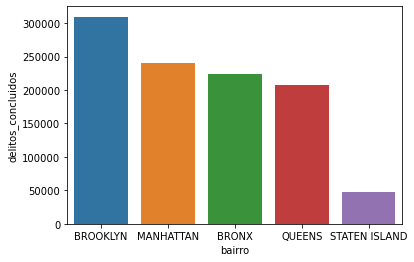

In [46]:
sns.barplot(x = 'bairro' , y = 'delitos_concluidos' , data = delitos_concluidos_por_bairros_df)

# Visualizando o comportamento dos delitos ao longo dos anos 

## Delitos 2013/2014/ 2015 

In [ ]:
# 
# df.groupby(df['data']).dt.year['vendas'].sum()

# gerando grafico
# df.groupby(df['data'].dt.year)['vendas'].sum().plot.bar()

In [49]:
select_ny.head()

,data_da_ocorrencia,data_final_da_ocorrencia,data_comunicacao_policia,hora_da_ocorrencia,hora_termino_da_ocorrencia,duracao_da_ocorrencia,descricao_da_ofensa,conclusao,nivel_de_ofensa,jurisdicao,bairro,local_da_ocorrencia,descricao_das_intalacoes
0,2015-12-31,NaT,2015-12-31,23:45:00,NaN,NaT,FORGERY,concluido,crime,N.Y. POLICE DEPT,BRONX,dentro,BAR/NIGHT CLUB
1,2015-12-31,NaT,2015-12-31,23:36:00,NaN,NaT,MURDER & NON-NEGL. MANSLAUGHTER,concluido,crime,N.Y. POLICE DEPT,QUEENS,fora,NaN
2,2015-12-31,NaT,2015-12-31,23:30:00,NaN,NaT,DANGEROUS DRUGS,concluido,crime,N.Y. POLICE DEPT,MANHATTAN,NaN,OTHER
3,2015-12-31,NaT,2015-12-31,23:30:00,NaN,NaT,ASSAULT 3 & RELATED OFFENSES,concluido,contravencao,N.Y. POLICE DEPT,QUEENS,dentro,RESIDENCE-HOUSE
4,2015-12-31,2015-12-31,2015-12-31,23:25:00,23:30:00,00:05:00,ASSAULT 3 & RELATED OFFENSES,concluido,contravencao,N.Y. POLICE DEPT,MANHATTAN,em_frente,OTHER


In [58]:
select_ny['data_da_ocorrencia'].month

AttributeError: 'Series' object has no attribute 'month'

In [ ]:
select_ny.head()

In [47]:
select_ny.conclusao.value_counts()

concluido        1029816
nao_concluido      18758
Name: conclusao, dtype: int64

In [48]:
crimes_2013_2015 = delitos_concluidos_por_bairros[['data_da_ocorrencia' , 'nivel_de_ofensa']]
crimes_2013_2015

,data_da_ocorrencia,nivel_de_ofensa
0,2015-12-31,crime
1,2015-12-31,crime
2,2015-12-31,crime
3,2015-12-31,contravencao
4,2015-12-31,contravencao
...,...,...
1048570,2013-11-01,contravencao
1048571,2013-11-01,contravencao
1048572,2013-11-01,crime
1048573,2013-11-01,contravencao


In [ ]:
crimes_2009_2015.nivel_de_ofensa.value_counts()

In [ ]:
crimes_2009 = crimes_2009_2015.query('data_da_ocorrencia >= "1/1/2009" & data_da_ocorrencia < "1/1/2010"') 

In [ ]:
crimes_2009

## Descrição da ofensa - Tipos de delitos mais comuns

In [ ]:
delitos_concluidos_por_bairros

In [ ]:
tipos_de_delitos = delitos_concluidos_por_bairros.descricao_da_ofensa.value_counts().to_frame().reset_index()
tipos_de_delitos.columns = ['descricao_da_ofensa' , 'quantidade']

In [ ]:
principais_delitos = tipos_de_delitos.head(19)
principais_delitos

## Nivel  de ofensa  dos delitos mais comuns
relacionar os tipos de delitos mais comuns com o nivel de ofensa 

In [ ]:
# separar crime e a descrição dos crimes 
# separar contravenção e ver a descrição da contravencção
# separar violação e ver a descrição da violação

## Detalhando os crimes 

In [ ]:
crimes_df = delitos_concluidos_por_bairros.query('nivel_de_ofensa == "crime"').descricao_da_ofensa.value_counts()
crimes_df = crimes_df.to_frame().reset_index()
crimes_df.columns = ['tipo_crimes','quantidade']
crimes_df

## Detalhando as contravenções 

In [ ]:
contravencoes_df = delitos_concluidos_por_bairros.query('nivel_de_ofensa == "contravencao"').descricao_da_ofensa.value_counts()
contravencoes_df = contravencoes_df.to_frame().reset_index()
contravencoes_df.columns = ['tipo_contravencao','quantidade']
contravencoes_df

## Detalhando as violações

In [ ]:
violacoes_df = delitos_concluidos_por_bairros.query('nivel_de_ofensa == "violacao"').descricao_da_ofensa.value_counts()
violacoes_df = violacoes_df.to_frame().reset_index()
violacoes_df.columns = ['tipo_violacao','quantidade']
violacoes_df

# Relação entre o  horario e os tipos de delitos 

## Qual departamento e responsável pelos delitos

In [ ]:
dep_resp_delitos = delitos_concluidos_por_bairros[['jurisdicao','descricao_da_ofensa','nivel_de_ofensa','local_da_ocorrencia']]
dep_resp_delitos

jurisdição

In [ ]:
jurisdicao_crimes = dep_resp_delitos.query('nivel_de_ofensa == "crime"')
jurisdicao_crimes.jurisdicao.value_counts()


In [ ]:
jurisdicao_contravencao = dep_resp_delitos.query('nivel_de_ofensa == "contravencao"')
jurisdicao_contravencao.jurisdicao.value_counts()


In [ ]:
jurisdicao_violacao = dep_resp_delitos.query('nivel_de_ofensa == "violacao" ')
jurisdicao_violacao.jurisdicao.value_counts()


## Local da ocorrencia 
#### Neste tópico , podemos separar o local onde ocorreu o delito , se dentro ou fora do estabelecimento em questão 

In [ ]:
# total de delitos concluidos 
total_registros = len(delitos_concluidos_por_bairros.local_da_ocorrencia)
total_registros

In [ ]:
# delitos que aconteceram na parte de dentro dos estabelecimentos
total_delitos_local_da_ocorrencia = delitos_concluidos_por_bairros.query('local_da_ocorrencia == "dentro" ')
total_delitos_dentro = sum(total_delitos_local_da_ocorrencia.local_da_ocorrencia.value_counts())
total_delitos_dentro

In [ ]:
#  delitos que aconteceram na parte de fora dos estabelecimentos
total_delitos_fora_do_local_da_ocorrencia = delitos_concluidos_por_bairros.query('local_da_ocorrencia != "dentro" ')
total_delitos_fora_do_local =  sum(total_delitos_fora_do_local_da_ocorrencia.local_da_ocorrencia.value_counts())
total_delitos_fora_do_local

In [ ]:
#  delitos que não tiveram registro se dentro ou fora do local da ocorrencia
delitos_sem_registro_do_local = total_registros - (total_delitos_dentro + total_delitos_fora_do_local)
delitos_sem_registro_do_local

In [ ]:
# crinado um DataFrame para visualizar os dados obtidos acima a respeito do local dos delitos


dados_local_da_ocorrencia = {
    'local' : ['dentro','fora', 'sem_registro'],
    'total' : [total_delitos_dentro, total_delitos_fora_do_local, delitos_sem_registro_do_local ]

}

dados_local_da_ocorrencia_df = pd.DataFrame(dados_local_da_ocorrencia)

In [ ]:
dados_local_da_ocorrencia_df

### Visualisando local onde acontecem os delitos 

In [ ]:
sns.barplot(x = 'local' , y = 'total' , data = dados_local_da_ocorrencia_df)

In [ ]:
dados_local_da_ocorrencia_df

## Verificando e visualizando quais os tipos de ofensa e suas ocorrencias

In [ ]:
# duração media do tipo nivel_de_ofensa x  descrição_da_ofensa 

In [ ]:
nivel_de_ofensa = select_ny.query('conclusao == "concluido" ')
nivel_de_ofensa_df = nivel_de_ofensa.nivel_de_ofensa.value_counts()
nivel_de_ofensa_df = nivel_de_ofensa_df.to_frame().reset_index()
nivel_de_ofensa_df.columns = ['ofensa' , 'quantidade']
nivel_de_ofensa_df
# visualizando os tipos de crimes e suas quantidades

In [ ]:
sns.barplot(x = 'ofensa' , y = 'quantidade' , data = nivel_de_ofensa_df)

### Duração media de cada tipo de ofensa

In [ ]:
nivel_de_ofensa

In [ ]:
duracao_crimes = nivel_de_ofensa.query('nivel_de_ofensa == "crime"')
duracao_crimes = duracao_crimes.duracao_da_ocorrencia.mean()
duracao_crimes

In [ ]:
duracao_contravencao = nivel_de_ofensa.query('nivel_de_ofensa == "contravencao"')
duracao_contravencao =  duracao_contravencao.duracao_da_ocorrencia.mean()
duracao_contravencao

In [ ]:
duracao_violacao = nivel_de_ofensa.query('nivel_de_ofensa == "violacao"')
duracao_violacao =  duracao_violacao.duracao_da_ocorrencia.mean()
duracao_violacao

### Distribuição dos tipos de ofensa por  bairros

#### BROOKLYN

In [ ]:
brooklyn = nivel_de_ofensa.query('bairro == "BROOKLYN" ')
brooklyn_df = brooklyn.nivel_de_ofensa.value_counts().to_frame().reset_index()
brooklyn_df.columns = ['ofensa' , 'quantidade']
brooklyn_df

In [ ]:
sns.barplot(x = 'ofensa' , y = 'quantidade' , data = brooklyn_df)

#### MANHATTAN

In [ ]:
manhattan = nivel_de_ofensa.query('bairro == "MANHATTAN" ')
manhattan_df = manhattan.nivel_de_ofensa.value_counts().to_frame().reset_index()
manhattan_df.columns = ['ofensa' , 'quantidade']
manhattan_df

In [ ]:
sns.barplot(x = 'ofensa' , y = 'quantidade' , data = manhattan_df)

#### BRONX

In [ ]:
bronx = nivel_de_ofensa.query('bairro == "BRONX" ')
bronx_df = bronx.nivel_de_ofensa.value_counts().to_frame().reset_index()
bronx_df.columns = ['ofensa' , 'quantidade']
bronx_df

In [ ]:
sns.barplot(x = 'ofensa' , y = 'quantidade' , data = bronx_df)

#### QUEENS

In [ ]:
queens = nivel_de_ofensa.query('bairro == "QUEENS"')
queens_df = queens.nivel_de_ofensa.value_counts().to_frame().reset_index()
queens_df.columns = ['ofensa' , 'quantidade']
queens_df

In [ ]:
sns.barplot(x = 'ofensa' , y = 'quantidade' , data = queens_df)

#### STATEN ISLAND

In [ ]:
staten_island = nivel_de_ofensa.query('bairro == "STATEN ISLAND"')
staten_island_df = staten_island.nivel_de_ofensa.value_counts().to_frame().reset_index()
staten_island_df.columns = ['ofensa' , 'quantidade']
staten_island_df

In [ ]:
sns.barplot(x = 'ofensa' , y = 'quantidade' , data = staten_island_df)

## Comparando as ocorrencias de contravenção em cada bairro

In [ ]:
# gerando as variaveis contravenção de cada bairro

# BROOKLYN
contravencao_brooklyn = sum(brooklyn_df.query('ofensa == "contravencao"').quantidade)
contravencao_brooklyn

# MANHATTAN
contravencao_manhattan = sum(manhattan_df.query('ofensa == "contravencao"').quantidade)
contravencao_manhattan

# BRONX
contravencao_bronx = sum(bronx_df.query('ofensa == "contravencao"').quantidade)
contravencao_bronx

# queens
contravencao_queens = sum(queens_df.query('ofensa == "contravencao"').quantidade)
contravencao_queens


# staten_island
contravencao_staten_island = sum(staten_island_df.query('ofensa == "contravencao"').quantidade)
contravencao_staten_island


In [ ]:

contravencao_por_bairros = {
    'bairro' : ['brooklyn', 'manhattan', 'bronx', 'queens', 'staten_island'],
    'total_contravencao' : [contravencao_brooklyn, contravencao_manhattan, contravencao_bronx, contravencao_queens, contravencao_staten_island ]

}

contravencao_por_bairros_df = pd.DataFrame(contravencao_por_bairros)

In [ ]:
contravencao_por_bairros_df

In [ ]:
sns.barplot(x = 'bairro' , y = 'total_contravencao' , data = contravencao_por_bairros_df)

In [ ]:
contravencao_por_bairros_df.plot(x = 'bairro' , y = 'total_contravencao' , color = 'red' )

## Comparando as ocorrencias de crimes em cada bairro

In [ ]:
# comparar delitos (crime x contravenção x violaçao ) entre os  bairros 
# criar variaveis e por meio de um dicionario criar um dataFrame e visualizar as comparaçoes

In [ ]:
# gerando as variaveis crimes de cada bairro

# BROOKLYN
crimes_brooklyn = sum(brooklyn_df.query('ofensa == "crime"').quantidade)
crimes_brooklyn

# MANHATTAN
crimes_manhattan = sum(manhattan_df.query('ofensa == "crime"').quantidade)
crimes_manhattan

# BRONX
crimes_bronx = sum(bronx_df.query('ofensa == "crime"').quantidade)
crimes_bronx

# queens
crimes_queens = sum(queens_df.query('ofensa == "crime"').quantidade)
crimes_queens


# staten_island
crimes_staten_island = sum(staten_island_df.query('ofensa == "crime"').quantidade)
crimes_staten_island


In [ ]:

crimes_por_bairros = {
    'bairro' : ['brooklyn', 'manhattan', 'bronx', 'queens', 'staten_island'],
    'total_crimes' : [crimes_brooklyn, crimes_manhattan, crimes_bronx, crimes_queens, crimes_staten_island ]

}

crimes_por_bairros_df = pd.DataFrame(crimes_por_bairros)

In [ ]:
crimes_por_bairros_df

In [ ]:
sns.barplot(x = 'bairro' , y = 'total_crimes' , data = crimes_por_bairros_df)

In [ ]:
crimes_por_bairros_df.plot(x = 'bairro' , y = 'total_crimes' , color = 'blue' )

## Comparando as ocorrencias de violação em cada bairro

In [ ]:
# gerando as variaveis violação de cada bairro

# BROOKLYN
violacao_brooklyn = sum(brooklyn_df.query('ofensa == "violacao"').quantidade)
violacao_brooklyn

# MANHATTAN
violacao_manhattan = sum(manhattan_df.query('ofensa == "violacao"').quantidade)
violacao_manhattan

# BRONX
violacao_bronx = sum(bronx_df.query('ofensa == "violacao"').quantidade)
violacao_bronx

# queens
violacao_queens = sum(queens_df.query('ofensa == "violacao"').quantidade)
violacao_queens


# staten_island
violacao_staten_island = sum(staten_island_df.query('ofensa == "violacao"').quantidade)
violacao_staten_island

In [ ]:

violacao_por_bairros = {
    'bairro' : ['brooklyn', 'manhattan', 'bronx', 'queens', 'staten_island'],
    'total_violacao' : [violacao_brooklyn, violacao_manhattan, violacao_bronx, violacao_queens, violacao_staten_island ]

}

violacao_por_bairros_df = pd.DataFrame(violacao_por_bairros)

In [ ]:
violacao_por_bairros_df

In [ ]:
sns.barplot(x = 'bairro' , y = 'total_violacao' , data = violacao_por_bairros_df)

# Crimes não concluidos por bairro

In [ ]:
crimes_nao_concluidos_por_bairros = select_ny.query('conclusao == "nao_concluido" ').bairro.value_counts()
crimes_nao_concluidos_por_bairros_df = pd.DataFrame(crimes_nao_concluidos_por_bairros).reset_index()
crimes_nao_concluidos_por_bairros_df.columns = ['bairro' , 'crimes_nao_concluidos']
sns.barplot(x = 'bairro' , y = 'crimes_nao_concluidos' , data = crimes_nao_concluidos_por_bairros_df)

In [ ]:
crimes_nao_concluidos_por_bairros_df

## Detalhando 

In [ ]:
crimes_falhos_df = select_ny.query('conclusao == "nao_concluido" ')
crimes_falhos_df
# crimes_falhos_df.dropna(subset = ['data_final_da_ocorrencia' ,'hora_termino_da_ocorrencia'])
# não podem ser excluidos pois muitos registros seriam peridos 

In [ ]:
descricao_crimes_falhos = crimes_falhos_df.descricao_da_ofensa.value_counts().to_frame().reset_index()
descricao_crimes_falhos.columns = [' descricao_da_ofensa' , 'quantidade']
descricao_crimes_falhos.head(20)
# quais os tipos e a quantidade dos crimes que não foram concluidos  